# Exploring Countries' Internet Use and Migration
- Refactored from Data-Question-1 at Nashville Software School's Data Science Program

In [2]:
# 3 import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
# 4 show plots in notebook
%matplotlib inline

## Read in Data

In [5]:
# 5 - 6
migration = pd.read_csv('data/net_migration.csv',
                       usecols = (0,1,2),
                       names = ("Country", "Year", "Net_Migration"),
                       header = 0)
migration.head(6)

,Country,Year,Net_Migration
0,Afghanistan,2012,473007
1,Afghanistan,2007,-677497
2,Afghanistan,2002,804120


In [35]:

migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
Country          2375 non-null object
Year             2375 non-null int64
Net_Migration    2375 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.7+ KB


In [6]:
internet_use = pd.read_csv('data/percentage_of_internet_users.csv',
                          usecols = (0, 1, 2),
                           header = 0,
                          names = ("Country", "Year", "Internet_Users_Pct"))
internet_use.head(6)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545


In [36]:
internet_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Country               4495 non-null object
Year                  4495 non-null int64
Internet_Users_Pct    4495 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.4+ KB


## EDA
Exploratory Data Analysis

In [7]:
migration.tail()

,Country,Year,Net_Migration
2370,Zimbabwe,1982,141524
2371,Zimbabwe,1977,-101516
2372,Zimbabwe,1972,-30360
2373,Zimbabwe,1967,-27996
2374,Zimbabwe,1962,-10001


In [8]:
internet_use.tail()

,Country,Year,Internet_Users_Pct
4671,176,NTIA/CPS survey.,NaN
4672,177,"Pew Internet Project, Internet",Broadband and cell phone statistics
4673,178,Estimated based on Survey's results. Populatio...,NaN
4674,179,Preliminary. Country estimate.,NaN
4675,180,The methodology used to estimated the figure f...,NaN


## Clean Data
- notice that rows after 4495 are footnotes and do not correspond to tidy data rows
    - Drop those rows

In [9]:
internet_use = pd.read_csv('data/percentage_of_internet_users.csv',
                          usecols = (0, 1, 2),
                           header = 0,
                          names = ("Country", "Year", "Internet_Users_Pct"),
                          nrows = 4495)
internet_use[4494:]

,Country,Year,Internet_Users_Pct
4494,Zimbabwe,1990,0.0


In [10]:
internet_use.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


## Inner merge the two dataframes on country and year

In [11]:
# 10
merged_dfs = pd.merge(migration, internet_use, 
                     how = 'inner', on = ("Country", "Year"))

In [12]:
# 11
merged_dfs.head()

,Country,Year,Net_Migration,Internet_Users_Pct
0,Afghanistan,2012,473007,5.454545
1,Afghanistan,2007,-677497,1.900000
2,Afghanistan,2002,804120,0.004561
3,Albania,2012,-91750,54.655959
4,Albania,2007,-252926,15.036115


In [37]:
merged_dfs.tail() # 12

,Country,Year,Net_Migration,Internet_Users_Pct
710,Zambia,1997,79445,0.009330
711,Zimbabwe,2012,-219922,17.090000
712,Zimbabwe,2007,-307650,10.850000
713,Zimbabwe,2002,-395554,3.994356
714,Zimbabwe,1997,-200000,0.033080


### take some slices of the data by specific years

In [14]:
# 13
years_of_interest = [2002, 2007, 2012]

# use a list comprehension to define the boolean index for the subset
subset_df = merged_dfs[[yr in years_of_interest for yr in merged_dfs.Year]]

# spot check
subset_df.Year.value_counts()

2007    168
2012    167
2002    164
Name: Year, dtype: int64

In [13]:
# 14
df2002 = merged_dfs.query('2001 < Year < 2003')
df2007 = merged_dfs[merged_dfs.Year == 2007]
df2012 = merged_dfs[merged_dfs.Year == 2012]

## Which Country had the highest and lowest percent of internet users for each year of interest?

In [46]:
# enable some print formatting classes
class pformat:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [47]:
# 18 - 20
dfs_of_interest = [df2002, df2007, df2012]
for df in dfs_of_interest:
    print("")
    print(pformat.BOLD + pformat.UNDERLINE + 'Country with highest internet use:' + pformat.END)
    print(df.sort_values(by = 'Internet_Users_Pct', 
                         ascending = False).head(1))
    print('')
    print(pformat.BOLD + pformat.UNDERLINE + 'Country with lowest internet use:' + pformat.END)
    print(df.sort_values(by = 'Internet_Users_Pct',
                        ascending = True).head(1))
    print("="*70)


Country with highest internet use:
     Country  Year  Net_Migration  Internet_Users_Pct
296  Iceland  2002           3894               79.12

Country with lowest internet use:
         Country  Year  Net_Migration  Internet_Users_Pct
641  Timor-Leste  2002             12                 0.0

Country with highest internet use:
     Country  Year  Net_Migration  Internet_Users_Pct
295  Iceland  2007           8041                90.6

Country with lowest internet use:
         Country  Year  Net_Migration  Internet_Users_Pct
640  Timor-Leste  2007        -104946            0.140959

Country with highest internet use:
     Country  Year  Net_Migration  Internet_Users_Pct
294  Iceland  2012           -378             96.2098

Country with lowest internet use:
     Country  Year  Net_Migration  Internet_Users_Pct
202  Eritrea  2012        -160001                 0.8


## Which Country had the highest and lowest net migration for the year of interest?

In [48]:
for df in dfs_of_interest:
    print(pformat.BOLD + pformat.UNDERLINE +'Country with highest net migration:' + pformat.END)
    print(df.sort_values(by = 'Net_Migration', 
                         ascending = False).head(1))
    print('')
    print(pformat.BOLD + pformat.UNDERLINE +'Country with lowest net migration:' + pformat.END)
    print(df.sort_values(by = 'Net_Migration',
                        ascending = True).head(1))
    print("="*70, "\n")

Country with highest net migration:
           Country  Year  Net_Migration  Internet_Users_Pct
688  United States  2002        5149157           58.785404

Country with lowest net migration:
    Country  Year  Net_Migration  Internet_Users_Pct
420  Mexico  2002       -2841190                11.9

Country with highest net migration:
           Country  Year  Net_Migration  Internet_Users_Pct
687  United States  2007        5070253                75.0

Country with lowest net migration:
       Country  Year  Net_Migration  Internet_Users_Pct
49  Bangladesh  2007       -3570954                 1.8

Country with highest net migration:
           Country  Year  Net_Migration  Internet_Users_Pct
686  United States  2012        5007887                79.3

Country with lowest net migration:
    Country  Year  Net_Migration  Internet_Users_Pct
299   India  2012       -2598218           12.580061



## Visualize some scatterplots of the relationship between internet use and migration for the years of interest

In [44]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [45]:
from bokeh.models import HoverTool

In [52]:
# 21
TOOLS = 'hover,crosshair,pan,zoom_in,zoom_out,box_zoom,undo,redo,reset, tap,save,box_select,poly_select,lasso_select'
p = figure(title = 'Internet Use Percentage vs Net Migration', tools = TOOLS)

colors = ['red', 'green', 'blue']

for df, yr, clr in zip(dfs_of_interest, years_of_interest, colors):
    x = df.Internet_Users_Pct
    y = df.Net_Migration
    p.circle(x, y, color = clr, legend = str(yr),
            fill_alpha = 0.2, size = 6, 
             muted_color = clr, muted_alpha = 0.1,
            hover_alpha = 1, hover_line_color = 'black')

p.xaxis.axis_label = 'Internet Use Percentage'
p.yaxis.axis_label = 'Net Migration' 
p.legend.click_policy = 'mute'
p.add_tools(HoverTool(tooltips = None))
show(p)

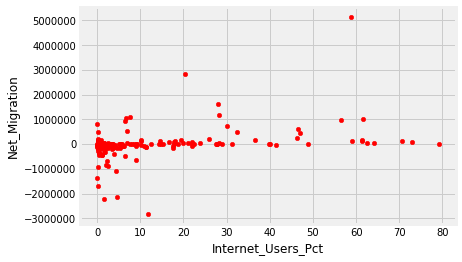

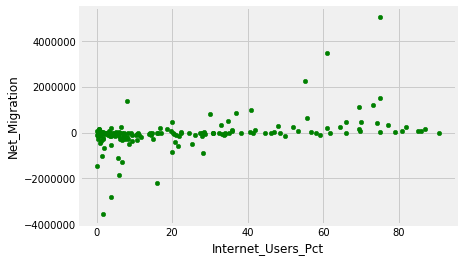

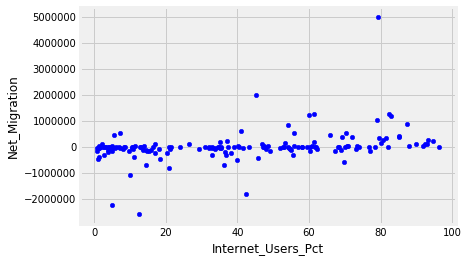

In [30]:
colors = ['red', 'green', 'blue']
for df, color in zip(dfs_of_interest, colors):
    df.plot(kind = 'scatter', color = color,
            x = 'Internet_Users_Pct', y = 'Net_Migration')
plt.show()

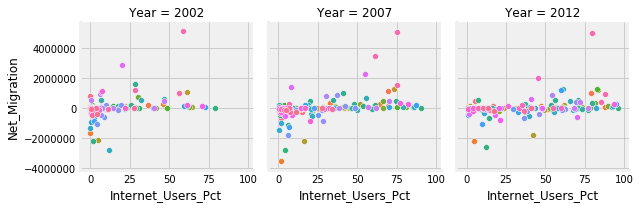

In [31]:
f = sns.FacetGrid(subset_df, col = 'Year', hue = 'Country')
f = (f.map(plt.scatter, 'Internet_Users_Pct','Net_Migration', edgecolor = 'w'))
plt.show()

22
## There are several differences accross the years
### 2002
- In 2002 there seems to be a strong correlation between low internet use and low migration (negative migration in fact).
- There seem to be only 2 dots with migration above 2 million.
    - Of which 1 is approximately 3 million with 20% IU
    - And the other is over 5 million with 60% IU
- Most of the dots seem to be clustered around low internet use and with low or negative net migration. Specifically between 0 and 20% of internet use.
- There are very few dots with negative migration above the 15% IU mark ### 2007
- There appears to be a global trend towards increased internet use. While the densest concentration seems to be between 0 and 20 % internet use, there are noticeably more dots along the 20-100 % internet use line
- There are still only 2 dots above the 2 million migration mark.
    - (60%IU, 3M) approximately
    - (80%IU, 5.5M) approximately
- The global migration minimum has decreased from <3M to <4M
- There are dots with negative migration through the 30% IU mark ### 2012
- The correlation between internet use and migration has decreased in magnitude but increased in scope. Now high internet use correlates with positive migration, and vice versa, (where before, the trend was most noticeable with low internet use and low migration.)
- There are still only two dots above the 2M migration mark
    - Perhaps these are two outlines which buck the general correlationary trend
- For 2012, there are dots with negative migration all the way up to the 70% IU mark

## 23. the distribution of Net Migration values for 2012 is unimodal, both strictly speaking and even when ignoring the highest outlier. When ignoring the two highest outliers, however, the distribution appears bimodal.


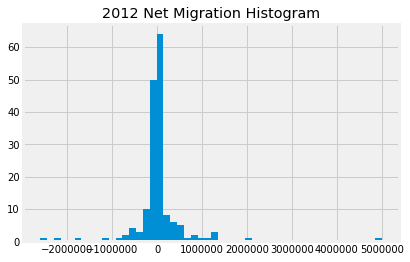

In [56]:
plt.hist(df2012.Net_Migration, bins = 50)
plt.title("2012 Net Migration Histogram")
plt.show()

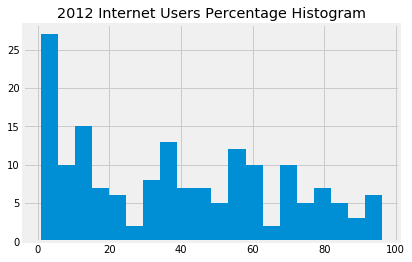

In [58]:
plt.hist(df2012.Internet_Users_Pct, bins = 20)
plt.title("2012 Internet Users Percentage Histogram")
plt.show()

## 24 The distribution of internet use for 2012 is unimodal

## 25 The top 5 countries in terms of internet use in per year are:

In [59]:
df2012.sort_values(by = "Internet_Users_Pct", ascending = False).head(5)

,Country,Year,Net_Migration,Internet_Users_Pct
294,Iceland,2012,-378,96.209800
479,Norway,2012,235665,94.649978
614,Sweden,2012,272626,93.179988
453,Netherlands,2012,110006,92.859992
180,Denmark,2012,96839,92.260012


In [60]:
df2007.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)

,Country,Year,Net_Migration,Internet_Users_Pct
295,Iceland,2007,8041,90.60
480,Norway,2007,174001,86.93
454,Netherlands,2007,55674,85.82
181,Denmark,2007,87989,85.03
615,Sweden,2007,262453,82.01


In [61]:
df2002.sort_values(by = 'Internet_Users_Pct', ascending = False).head(7)

,Country,Year,Net_Migration,Internet_Users_Pct
296,Iceland,2002,3894,79.120000
481,Norway,2002,67400,72.840000
616,Sweden,2002,141723,70.570000
182,Denmark,2002,46306,64.250000
221,Finland,2002,31935,62.430000
126,Canada,2002,1026702,61.593299
621,Switzerland,2002,186125,61.400000


In [62]:
top5_2012 = df2012.sort_values(by = 'Internet_Users_Pct', ascending=False,).head(5)
top5_2007 = df2007.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)
top7_2002 = df2002.sort_values(by = 'Internet_Users_Pct', ascending = False).head(7)
top_5_internet_diachronic = merged_dfs.query('Country == "Iceland" or Country == "Norway" or Country == "Sweden" or Country == "Denmark" or Country == "Switzerland"')
# 26
top_5_internet = top_5_internet_diachronic.query('Year == "2002" or Year == "2007" or Year == "2012"')

## Visualize the diachronic change of Internet Users Percentage for the top five internet using countries

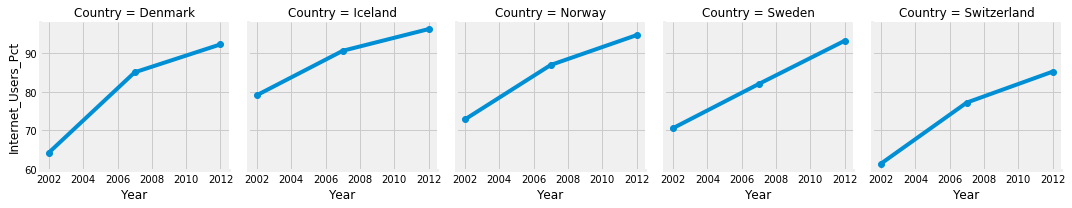

In [63]:
# 27
top5_grid = sns.FacetGrid(top_5_internet, col = "Country")
top5_grid.map(plt.plot, "Year", "Internet_Users_Pct", marker = 'o')

## Visualize the diachronic change of Internet Users Percentage for the bottom five internet using countries

In [64]:
df2012.sort_values(by = 'Internet_Users_Pct', ascending=True,).head(5)

,Country,Year,Net_Migration,Internet_Users_Pct
202,Eritrea,2012,-160001,0.8000
639,Timor-Leste,2012,-50004,0.9147
441,Myanmar,2012,-474278,1.0691
108,Burundi,2012,40000,1.2200
559,Sierra Leone,2012,-21000,1.3000


In [67]:
lowest_5_2012internet_diachronic = merged_dfs.query('Country == "Eritrea" or Country == "Timor-Leste" or Country == "Myanmar" or Country == "Burundi" or Country == "Sierra Leone"')

In [68]:
lowest_5_2012internet = lowest_5_2012internet_diachronic.query('Year == "2002" or Year == "2007" or Year == "2012"')

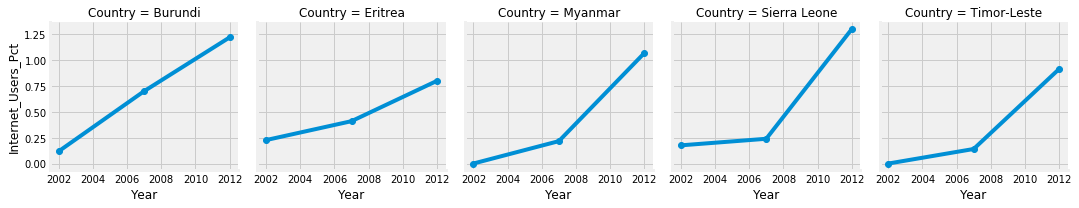

In [69]:
lowest_5grid = sns.FacetGrid(lowest_5_2012internet, col = "Country")
lowest_5grid.map(plt.plot, "Year", "Internet_Users_Pct", marker = 'o')